In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("nitems.csv")

In [8]:
df.head()

,order_id,user_id,eval_set,order_dow,order_hour_of_day,days_since_prior_order,n_basket_items,avg_basket,hour_day_bucket,avg_time_bucket_basket_0,...,fav_dpt_14,fav_dpt_15,fav_dpt_16,fav_dpt_17,fav_dpt_18,fav_dpt_19,fav_dpt_20,fav_dpt_21,n_last_order,n_highest
0,1187899,1,train,4,8,14,10,5.185714,2,4.230769,...,0,0,0,0,0,1,0,0,4,10
1,1492625,2,train,1,11,30,12,8.646018,2,0.000000,...,0,0,1,0,0,0,0,0,11,14
2,2196797,5,train,0,11,6,4,3.869565,2,3.785714,...,0,0,0,0,0,0,0,0,2,8
3,"525,192",7,train,2,11,6,8,8.316279,1,4.795918,...,0,0,0,0,0,0,0,0,4,20
4,"880,375",8,train,1,14,10,4,3.835821,1,1.911765,...,0,0,0,0,0,0,0,0,5,8


In [34]:
np.random.seed(7)
msk = np.random.rand(len(df)) < 0.8
y_col = ['n_basket_items']
x_col = ['order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'avg_basket',
       'hour_day_bucket', 'avg_time_bucket_basket_0',
       'avg_time_bucket_basket_1', 'avg_time_bucket_basket_2',
       'avg_time_bucket_basket_3', 'department_id', 'fav_dpt_1', 'fav_dpt_2',
       'fav_dpt_3', 'fav_dpt_4', 'fav_dpt_5', 'fav_dpt_6', 'fav_dpt_7',
       'fav_dpt_8', 'fav_dpt_9', 'fav_dpt_10', 'fav_dpt_11', 'fav_dpt_12',
       'fav_dpt_13', 'fav_dpt_14', 'fav_dpt_15', 'fav_dpt_16', 'fav_dpt_17',
       'fav_dpt_18', 'fav_dpt_19', 'fav_dpt_20', 'fav_dpt_21', 'n_last_order',
       'n_highest']

train = df[msk]
test = df[~msk]
train_y, train_x = train[y_col], train[x_col]
test_y, test_x = test[y_col], test[x_col]

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


print("Fit regression model")
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(train_x, train_y)
regr_2.fit(train_x, train_y)

print("Predict")
y_1 = regr_1.predict(test_x)
y_2 = regr_2.predict(test_x)



'''
# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()'''

Fit regression model
Predict


'\n# Plot the results\nplt.figure()\nplt.scatter(X, y, c="darkorange", label="data")\nplt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)\nplt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)\nplt.xlabel("data")\nplt.ylabel("target")\nplt.title("Decision Tree Regression")\nplt.legend()\nplt.show()'

In [38]:
mse1 = mean_squared_error(y_1, test_y.as_matrix())
print(mse1)
mse2 = np.sqrt(mean_squared_error(y_2, test_y.as_matrix()))
print(mse2)

15.2477684629
3.54697698596


In [44]:
#now for adaboost
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(7)
ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)


ada_model.fit(train_x, train_y.values.ravel())

# Predict
ada_y = ada_model.predict(test_x)

In [45]:
mse_ada = mean_squared_error(ada_y, test_y.as_matrix())
mse_ada

15.976303428141012

In [52]:
score(test_x, test_yy, sample_weight=None)

NameError: name 'score' is not defined

In [75]:
'''
The real deal. Setting up grid search methods for fine tuning GBR
'''
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.tree import DecisionTreeRegressor #decsion tree regression
from sklearn.ensemble import AdaBoostRegressor #AdaBoost
from sklearn import metrics
from sklearn.grid_search import GridSearchCV   #for grid search over parameters
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
dept_df=pd.read_csv('user_department_predictions.csv')
dept_df.head()

,user_id,dept,dept_id,prob_purchased
0,2,meat seafood,12,0.120269
1,7,meat seafood,12,0.345530
2,9,meat seafood,12,0.286382
3,10,meat seafood,12,0.634088
4,14,meat seafood,12,0.168476


In [68]:
#read department csv
dept_df=pd.read_csv('user_department_predictions.csv')

#turn these into vectors
def category_vectors(df):
    #make a df of just user ids
    user_dept_df = pd.DataFrame()
    user_dept_df['user_id'] = df.user_id.unique()

    for dept_n in range(1,22):
        #create key
        key = "dept_score_"+str(dept_n)
        
        temp_df = pd.DataFrame()
        temp_df[['user_id',key]] = df[df.dept_id == dept_n][['user_id','prob_purchased']]

        user_dept_df = pd.merge(user_dept_df, temp_df, on='user_id', how="left")
        
    return user_dept_df

user_dept_df = category_vectors(df)
user_dept_df.fillna(0, inplace=True)
user_dept_df.head()

,user_id,dept_score_1,dept_score_2,dept_score_3,dept_score_4,dept_score_5,dept_score_6,dept_score_7,dept_score_8,dept_score_9,...,dept_score_12,dept_score_13,dept_score_14,dept_score_15,dept_score_16,dept_score_17,dept_score_18,dept_score_19,dept_score_20,dept_score_21
0,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.343027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.286242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.634655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.169770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.201918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#read the main and merge wityh department scores
n_items_df = pd.read_csv('n_items.csv')
n_items_df = pd.merge(n_items_df, user_dept_df, on="user_id", how="left")
n_items_df.fillna(0, inplace=True)

#split it and never use the test set please...
np.random.seed(7)
msk = np.random.rand(len(n_items_df)) < 0.9
train = n_items_df[msk]
test = n_items_df[~msk]

#columns
y_col = ['n_basket_items']
x_col = ['order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'avg_basket',
       'avg_time_bucket_basket_0', 'avg_time_bucket_basket_1',
       'avg_time_bucket_basket_2', 'avg_time_bucket_basket_3', 'n_last_order',
       'n_highest', 'std_basket', 'dept_score_1', 'dept_score_2',
       'dept_score_3', 'dept_score_4', 'dept_score_5', 'dept_score_6',
       'dept_score_7', 'dept_score_8', 'dept_score_9', 'dept_score_10',
       'dept_score_11', 'dept_score_12', 'dept_score_13', 'dept_score_14',
       'dept_score_15', 'dept_score_16', 'dept_score_17', 'dept_score_18',
       'dept_score_19', 'dept_score_20', 'dept_score_21']

In [79]:
#cross validation function
def cv_modelfit(alg, dtrain, y, predictors, performCV=False, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    print("fit")
    alg.fit(dtrain[predictors], dtrain[y].values.ravel())
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Perform cross-validation:

    if performCV:
        print("CV")
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[y].values.ravel(), cv=cv_folds, scoring='neg_mean_squared_error')
 
    #Print model report:
    print ("\nModel Report")
    print ("MSE : %.4g" % metrics.mean_squared_error(dtrain[y].values, dtrain_predictions))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [83]:
#baseline models:
rng = np.random.RandomState(7)

gbm0 = GradientBoostingClassifier(random_state=rng)
dtr = DecisionTreeRegressor(max_depth=5)
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=60, random_state=rng)

print("DTR")
cv_modelfit(dtr, train, y_col, x_col)
print("ADA")
cv_modelfit(ada, train, y_col, x_col)

DTR
fit
CV

Model Report
MSE : 12.22
CV Score : Mean - -12.4303 | Std - 0.166633 | Min - -12.71544 | Max - -12.23039
ADA
fit


/Users/austin.slakey/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV


/Users/austin.slakey/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/austin.slakey/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/austin.slakey/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/austin.slakey/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array w


Model Report
MSE : 12.92
CV Score : Mean - -13.35862 | Std - 0.3912215 | Min - -13.85166 | Max - -12.67697


# Reading Data

In [1]:
import pandas as pd 
model_df = pd.read_csv("items_train.txt")
test_users = pd.read_csv("items_test.txt")

assert model_df.keys().all() == test_users.keys().all()
print("model shape",model_df.shape)
print("test shape",test_users.shape)
print("keys",model_df.keys())

model shape (131209, 13)
test shape (75000, 13)
keys Index(['user_id', 'n_basket_items', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'avg_basket',
       'std_basket', 'hour_day_bucket', 'avg_time_bucket_basket_0',
       'avg_time_bucket_basket_1', 'avg_time_bucket_basket_2',
       'avg_time_bucket_basket_3'],
      dtype='object')


# Test Train Split

In [2]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.tree import DecisionTreeRegressor #decsion tree regression
from sklearn.ensemble import AdaBoostRegressor #AdaBoost
from sklearn import metrics
from sklearn.grid_search import GridSearchCV   #for grid search over parameters
import matplotlib.pyplot as plt

x_keys = ['order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'avg_basket',
       'std_basket', 'hour_day_bucket', 'avg_time_bucket_basket_0',
       'avg_time_bucket_basket_1', 'avg_time_bucket_basket_2',
       'avg_time_bucket_basket_3']
y_keys = ['n_basket_items']

msk = np.random.rand(len(model_df)) < 0.8

train = model_df[msk]
test = model_df[~msk]
train_y, train_x = train[y_keys], train[x_keys]
test_y, test_x = test[y_keys], test[x_keys]

/Users/austin.slakey/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/austin.slakey/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Modeling

In [3]:
#cross validation function
def cv_modelfit(alg, dtrain, y, predictors, performCV=False, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    print("fit")
    alg.fit(dtrain[predictors], dtrain[y].values.ravel())
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Perform cross-validation:

    if performCV:
        print("CV")
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[y].values.ravel(), cv=cv_folds, scoring='neg_mean_squared_error')
 
    #Print model report:
    print ("\nModel Report")
    print ("MSE : %.4g" % metrics.mean_squared_error(dtrain[y].values, dtrain_predictions))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

DTR
fit

Model Report
MSE : 12.22
GBM
fit

Model Report
MSE : 10.37


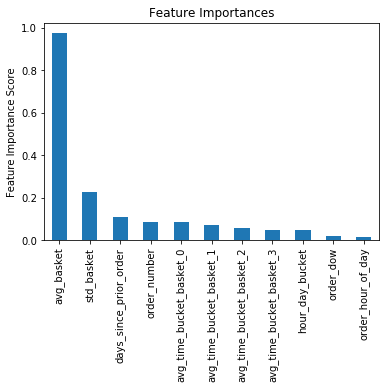

In [4]:
%matplotlib inline
#baseline models:
rng = np.random.RandomState(7)

gbm0 = GradientBoostingRegressor(random_state=rng)
dtr = DecisionTreeRegressor(max_depth=5)
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=60, random_state=rng)

print("DTR")
cv_modelfit(dtr, train, y_keys, x_keys)
print("GBM")
cv_modelfit(gbm0, test, y_keys, x_keys)

In [5]:
#N Estimators (opt = 100):
param_test1 = {'n_estimators':list(range(60,120,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(test[x_keys],test[y_keys].values.ravel())
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -11.30595, std: 0.52016, params: {'n_estimators': 60},
  mean: -11.31018, std: 0.51826, params: {'n_estimators': 70},
  mean: -11.30583, std: 0.52894, params: {'n_estimators': 80},
  mean: -11.29580, std: 0.52939, params: {'n_estimators': 90},
  mean: -11.29519, std: 0.52932, params: {'n_estimators': 100},
  mean: -11.29800, std: 0.54118, params: {'n_estimators': 110}],
 {'n_estimators': 100},
 -11.295185910636496)

In [6]:
#Max Depth (opt=15) Min Samples Split (opt is 150)
param_test2 = {'max_depth':list(range(5,20,5)), 'min_samples_split':list(range(50,200,50))}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(test[x_keys],test[y_keys].values.ravel())
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -11.46117, std: 0.49023, params: {'max_depth': 5, 'min_samples_split': 50},
  mean: -11.50036, std: 0.52166, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: -11.52691, std: 0.50937, params: {'max_depth': 5, 'min_samples_split': 150},
  mean: -10.96048, std: 0.44431, params: {'max_depth': 10, 'min_samples_split': 50},
  mean: -11.01696, std: 0.50443, params: {'max_depth': 10, 'min_samples_split': 100},
  mean: -10.98839, std: 0.56768, params: {'max_depth': 10, 'min_samples_split': 150},
  mean: -11.34236, std: 0.49489, params: {'max_depth': 15, 'min_samples_split': 50},
  mean: -11.06203, std: 0.58582, params: {'max_depth': 15, 'min_samples_split': 100},
  mean: -10.91838, std: 0.56341, params: {'max_depth': 15, 'min_samples_split': 150}],
 {'max_depth': 15, 'min_samples_split': 150},
 -10.918381453470342)

In [8]:
#Min Samples Leaf (opt=70)
param_test3 = {'min_samples_leaf':list(range(70,121,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=15, max_features='sqrt', min_samples_split=150, subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(test[x_keys],test[y_keys].values.ravel())
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -10.75325, std: 0.46154, params: {'min_samples_leaf': 70},
  mean: -10.80850, std: 0.42758, params: {'min_samples_leaf': 80},
  mean: -10.87654, std: 0.52766, params: {'min_samples_leaf': 90},
  mean: -10.86884, std: 0.49651, params: {'min_samples_leaf': 100},
  mean: -10.81452, std: 0.48949, params: {'min_samples_leaf': 110},
  mean: -10.84844, std: 0.54253, params: {'min_samples_leaf': 120}],
 {'min_samples_leaf': 70},
 -10.753249985252447)

In [27]:
#max features (opt=1, Stumps!)
#Min Samples Leaf (opt=70)
param_test4 = {'max_features':list(range(1,4,1))}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=15, min_samples_leaf=70, min_samples_split=150, subsample=0.8, random_state=10), 
param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(test[x_keys],test[y_keys].values.ravel())
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: -10.70492, std: 0.52810, params: {'max_features': 1},
  mean: -10.83704, std: 0.50178, params: {'max_features': 2},
  mean: -10.75325, std: 0.46154, params: {'max_features': 3}],
 {'max_features': 1},
 -10.704920062993198)

In [29]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,max_depth=15,min_samples_split=150, min_samples_leaf=70, random_state=10,max_features=3),
param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch5.fit(test[x_keys],test[y_keys].values.ravel())
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: -10.86592, std: 0.48395, params: {'subsample': 0.6},
  mean: -10.91534, std: 0.46996, params: {'subsample': 0.7},
  mean: -10.85868, std: 0.49538, params: {'subsample': 0.75},
  mean: -10.75325, std: 0.46154, params: {'subsample': 0.8},
  mean: -10.75583, std: 0.47568, params: {'subsample': 0.85},
  mean: -10.77137, std: 0.49884, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 -10.753249985252447)

GBM
fit

Model Report
MSE : 10.37
GBM Tuned
fit

Model Report
MSE : 5.44


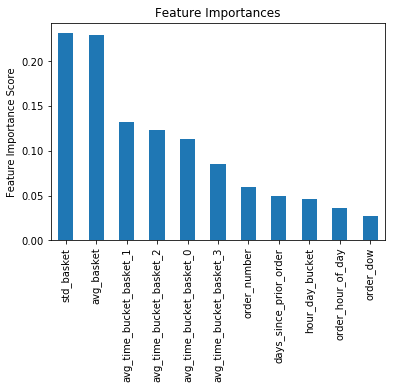

In [32]:
'''
Optimal Parameters:
min_samples_split: 150
min_samples_leaf: 70
max_depth: 15
max_features: 3
'''
#Crank down learning rate/up n estimaters
gbm_tuned = GradientBoostingRegressor(learning_rate=0.05, n_estimators=500,max_depth=15, min_samples_split=150,min_samples_leaf=70, subsample=0.8, random_state=10, max_features=3)
print("GBM")
cv_modelfit(gbm0, test, y_keys, x_keys)
print("GBM Tuned")
cv_modelfit(gbm_tuned, test, y_keys, x_keys)

# Train on Larger Dataset then score the test users

In [37]:
from sklearn.metrics import mean_squared_error
#Train and score
def modelfit(alg, dtest, dtrain, unknown, y, predictors):
    #Fit the algorithm on the data
    print("fit")
    alg.fit(dtrain[predictors], dtrain[y].values.ravel())
        
    #Predict training set:
    dtest_predictions = alg.predict(dtest[predictors])
    print("performance on holdout test set:")
    print(mean_squared_error(dtest_predictions, dtest[y].as_matrix()))
    
    unknown_predictions = alg.predict(unknown[predictors])
    
    return unknown_predictions
    
predictions = modelfit(gbm_tuned, test, test, test_users, y_keys, x_keys)

fit
performance on holdout test set:
5.44023521104


In [40]:
#final Model :o
final_predictions = modelfit(gbm_tuned, test, train, test_users, y_keys, x_keys)

fit
performance on holdout test set:
10.0697882921


In [45]:
len(final_predictions)

75000

In [46]:
test_users.n_basket_items = final_predictions
print(test_users.head())
print(test_users.n_basket_items.describe())

   user_id  n_basket_items  order_number  order_dow  order_hour_of_day  \
0        3        5.904214            13          5                 15   
1        4       -0.005815             6          3                 12   
2        6        1.516739             4          3                 16   
3       11        7.452950             8          6                 11   
4       12        2.953709             6          1                 20   

   days_since_prior_order  avg_basket  std_basket  hour_day_bucket  \
0                      11    4.659091    2.397377                1   
1                      30    0.388889    0.487498                2   
2                      22    1.000000    1.000000                0   
3                       8    4.957447    3.695641                2   
4                      30    3.324324    2.144182                2   

   avg_time_bucket_basket_0  avg_time_bucket_basket_1  \
0                  3.076923                  5.322581   
1                  1

In [47]:
test_users.to_csv("n_items_predictions")